### DoorDash Investment Analysis

##### "This report analyzes DoorDash (DASH) stock performance from its IPO in late 2020 to June 2025 and potential investment recommendation that could arise from the patterns. The dataset was assess using:

1) #### "A1 Cleaning Rules" to clean data before analysis.
2) #### "A1 Feature Engineering" guidelines to capture key elements used for simple investment analysis. This include key trends in price, volatility, volume including moving averages and Bollinger Bands.
3) #### "A1 Key Dates" to find notable high and low points across years. 

#### However, past price trends alone are not sufficient to justify a clear investment decision. We should continue monitoring DoorDash’s business fundamentals and market conditions closely. A final recommendation should consider not just historical patterns, but also future growth potential, competition, and overall strategic trajectory."

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning Data
> This section is the data cleaning process, we first observed the dataset, checked for duplicate dates, and examined each column for missing values. We then removed duplicate entries, sorted the data chronologically, and filled missing values according to the criteria provided. These steps ensure the dataset is clean, consistent, and ready for efficient analysis in the following tasks, to determining returns, volatility, and drawing trading insights.

In [77]:
df = pd.read_csv("../Group Assignment/DASH_A1.csv")
df  

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


In [78]:
print("Duplicates:", df.duplicated().sum())
print("Missing (total):", df.isnull().sum().sum())
df[df.isnull().any(axis=1)]

Duplicates: 50
Missing (total): 108


,Date,Close,High,Low,Open,Volume
22,28-09-2023,77.800003,79.739998,76.599998,77.110001,NaN
26,02-05-2022,82.260002,85.370003,78.790001,81.620003,NaN
28,02-08-2021,NaN,179.529999,169.800003,175.350006,NaN
29,29-03-2022,123.550003,125.110001,115.459999,NaN,5660300.0
52,02-12-2021,166.119995,NaN,160.289993,163.509995,3866800.0
...,...,...,...,...,...,...
1086,08-01-2025,173.720001,NaN,169.860001,171.199997,2189400.0
1138,10-05-2024,114.839996,NaN,114.099998,116.720001,4407000.0
1141,04-11-2021,NaN,209.580002,204.270004,207.250000,1387100.0
1152,02-05-2025,205.089996,NaN,199.429993,200.070007,NaN


In [79]:
df["Date"] = pd.to_datetime(df.Date)
df = df.set_index("Date").sort_index().drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1111 non-null   float64
 1   High    1110 non-null   float64
 2   Low     1119 non-null   float64
 3   Open    1119 non-null   float64
 4   Volume  1108 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB


/tmp/ipykernel_21864/203464963.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df.Date)


In [80]:
print("Duplicates:", df.duplicated().sum())
print("Missing (total):", df.isnull().sum().sum())

Duplicates: 0
Missing (total): 103


In [81]:
#Fill Open Prices
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [82]:
# Fill Close Prices
df['Close'] = df["Close"].ffill()
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [83]:
#Fill High and Low prices for each month
df['YearMonth'] = df.index.to_period('M')
data_monthly = df.groupby('YearMonth')[['High', 'Low']].mean().reset_index()
df = df.reset_index()
df = pd.merge(df, data_monthly, on='YearMonth', how='left', suffixes=('', '_monthly_mean'))
df['High'] = df['High'].fillna(df['High_monthly_mean'])
df['Low'] = df['Low'].fillna(df['Low_monthly_mean'])

df.set_index('Date', inplace=True)


df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,2020-12,165.803438,152.148868
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868
...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702


In [84]:
# Fill zero volume as no trade (Locate)
rows_zero = df.loc[df["Open"] == (df["Close"])]
rows_zero


,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2025-01-09,173.720001,178.673632,174.31715,173.720001,NaN,2025-01,178.673632,174.31715


In [85]:
# Fill zero volume as no trade (Setup)
zeroVol = df['Volume'].isna() & (df["Open"] == df["Close"])

In [86]:
# Fill zero volume as no trade (Execute)
df.loc [zeroVol, 'Volume'] = 0
rows_zero = df.loc[df["Open"] == df["Close"]]
print(rows_zero)

                 Close        High        Low        Open  Volume YearMonth  \
Date                                                                          
2025-01-09  173.720001  178.673632  174.31715  173.720001     0.0   2025-01   

            High_monthly_mean  Low_monthly_mean  
Date                                             
2025-01-09         178.673632         174.31715  


In [87]:
# Fill median volume (Locate)
median_test = df.loc[df['Volume'].isna() & (df["Open"] != df["Close"])]
median_test

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,2020-12,165.803438,152.148868
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN,2021-03,145.023173,134.252096
2021-07-09,178.559998,181.649994,176.539993,180.660004,NaN,2021-07,181.732048,175.027189
2021-08-02,174.289993,179.529999,169.800003,175.350006,NaN,2021-08,189.265226,181.609591
2021-08-25,188.250000,190.119995,184.550003,185.449997,NaN,2021-08,189.265226,181.609591
2021-10-08,204.419998,207.990005,204.149994,204.899994,NaN,2021-10,210.988051,204.159999
2022-05-02,82.260002,85.370003,78.790001,81.620003,NaN,2022-05,74.154143,66.352143
2022-07-25,71.760002,73.920789,70.349998,73.120003,NaN,2022-07,73.920789,69.314899
2022-10-24,44.430000,44.959999,41.365002,44.599998,NaN,2022-10,48.385250,45.637381


In [88]:
# Fill median volume (Setup and Execute)
median_vol =df["Volume"].median()
median_test = df['Volume'].isna() & (df["Open"] != df["Close"])

df.loc[median_test,"Volume"] = median_vol

#Test
print(df.Volume, '2020-12-20')


Date
2020-12-09    25373700.0
2020-12-10     3506600.0
2020-12-11     4760600.0
2020-12-14     7859600.0
2020-12-15     5017000.0
                 ...    
2025-06-09     2710300.0
2025-06-10     3916700.0
2025-06-11     3091500.0
2025-06-12     2510400.0
2025-06-13      616326.0
Name: Volume, Length: 1134, dtype: float64 2020-12-20


In [89]:
# Fill median volume (Test2)
median_test = df['Volume'].isna() & (df["Open"] != df["Close"])
median_test.sum()

np.int64(0)

### Feature Enginering
> This section, we applied a set of feature engineering techniques to enhance the analytical depth of our dataset. These include return calculations, volatility measures, momentum indicators, and trading behavior flags such as price surges and volume spikes. With these metrics prepared, the data is somewhat ready for visual exploration and future investment analysis.

In [90]:
# 1. Simple Daily Returns
df['Returns'] = df.Close.pct_change()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns
Date,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938
...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165


In [91]:
# 2. Logarithmic Returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns
Date,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079


In [92]:
# 3. 20-Day Momentum
df['20-day momentum'] = df.Close-df.Close.shift(20)
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum
Date,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000


In [93]:
# 4. 20-Day Simple Moving Average
df['20-Day Simple Moving Average'] = df.Close.rolling(20).mean()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average
Date,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498


In [94]:
# 5. 20-Day Rolling Volatility
df['20-Day Rolling Volatility'] = df.Close.rolling(20).std()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility
Date,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998,7.886279
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498,7.341377
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498,7.304940


In [95]:
# 6. Day of the Week
df['Day'] = df.index.day_name()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN,NaN,Wednesday
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN,NaN,Thursday
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN,NaN,Friday
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN,NaN,Monday
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998,7.886279,Monday
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498,7.341377,Tuesday
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498,7.304940,Wednesday


In [96]:
# 7. Price Surge Identification
Return_Threshold = df.Returns.mean() +4*df.Returns.std()
df[df['Returns'] > Return_Threshold]

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2021-01-12,191.990005,201.929993,162.615005,165.500000,7081800.0,2021-01,191.348631,172.424631,0.149641,0.139450,16.990005,154.739500,12.446499,Tuesday
2021-05-14,141.070007,146.630005,123.570000,125.000000,15264700.0,2021-05,137.700264,128.870000,0.221491,0.200072,-8.419998,138.449501,14.755416,Friday
2023-11-02,87.790001,90.339996,84.389999,85.089996,12346100.0,2023-11,92.605714,89.375050,0.156653,0.145531,13.980003,75.925500,4.015746,Thursday


In [97]:
# 8. Volume Spike Identification
Volume_Threshold = df.Volume.mean()+6*df.Volume.std()

df[df['Volume'] > Volume_Threshold]

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2022-02-17,105.029999,116.000000,100.529999,115.600998,47405700.0,2022-02,104.549420,95.623790,0.106861,0.101528,-21.750000,103.309499,7.700510,Thursday
2023-12-15,101.570000,103.309998,100.220001,102.739998,30556000.0,2023-12,101.082685,98.451450,-0.001867,-0.001869,6.480003,97.266250,2.885046,Friday
2025-03-21,190.619995,194.399994,187.197006,190.720001,73637400.0,2025-03,192.537286,183.494096,-0.011973,-0.012045,-9.320007,189.258000,7.074886,Friday


In [98]:
# 9. Boillinger Band Calculation
df['SMA'] = df['Close'].rolling(20).mean()
df['Dev'] = df['Close'].rolling(20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

### Key Dates
> This section we identify key dates and metrics that reflect significant market activity and price movements for each year. By extracting moments such as the highest volatility, largest surge or drop, and peak volume days, we gain insight into the timing and impact of notable trading events. These indicators could help us contextualize market behavior and support informed investment recommendation.

In [99]:
# 1. Highest Volatility Day

df["Year"] = df.index.to_period("Y")
df["Vol_Return"] = df.Returns.rolling(20).std()

HVol_Day = df.groupby("Year").agg(
    PeakVol=("Vol_Return", "max")
)

# Find PeakDate
peak_dates = df.groupby("Year")["Vol_Return"].idxmax()
HVol_Day["PeakDate"] = peak_dates

HVol_Day

,PeakVol,PeakDate
Year,,
2020,NaN,NaT
2021,0.067393,2021-05-20
2022,0.080994,2022-06-01
2023,0.047470,2023-11-06
2024,0.033547,2024-02-27
2025,0.048324,2025-04-10


In [100]:
# 2. Largest Price Surge Day

Largest_PS = df.groupby("Year").agg(
    PeakReturn=("Returns", "max")
)

# Compute the PeakDate
peak_dates = df.groupby("Year")["Returns"].idxmax()
Largest_PS["PeakDate"] = peak_dates

Largest_PS


,PeakReturn,PeakDate
Year,,
2020,0.078724,2020-12-18
2021,0.221491,2021-05-14
2022,0.134512,2022-03-16
2023,0.156653,2023-11-02
2024,0.083457,2024-08-02
2025,0.137738,2025-04-09


In [101]:
# 3. Largest Price Drop Day
Large_PD = df.groupby("Year").agg(
    DropValue=("Returns", "min")
)

# Compute the DropDate
drop_dates = df.groupby("Year")["Returns"].idxmin()
Large_PD["DropDate"] = drop_dates

Large_PD


,DropValue,DropDate
Year,,
2020,-0.085714,2020-12-14
2021,-0.135457,2021-02-22
2022,-0.131621,2022-05-11
2023,-0.075946,2023-02-17
2024,-0.103170,2024-05-02
2025,-0.080634,2025-04-03


In [102]:
# 4. Highest Volume Day
Highest_Volume = df.groupby("Year").agg(
    MaxVolume=("Volume", "max")
)

# Compute MaxDate
max_dates = df.groupby("Year")["Volume"].idxmax()
Highest_Volume["MaxDate"] = max_dates

Highest_Volume



,MaxVolume,MaxDate
Year,,
2020,25373700.0,2020-12-09
2021,20400000.0,2021-03-09
2022,47405700.0,2022-02-17
2023,30556000.0,2023-12-15
2024,22134800.0,2024-05-02
2025,73637400.0,2025-03-21


In [103]:
# 5. Highest High and Lowest Low
hi_lo_per_year = df.groupby("Year").agg(
    HighestHigh=("High", "max"),
    LowestLow=("Low", "min")
)

# Find dates separately
high_dates = df.groupby("Year")["High"].idxmax()
low_dates = df.groupby("Year")["Low"].idxmin()

# Add date columns
hi_lo_per_year["HighDate"] = high_dates
hi_lo_per_year["LowDate"] = low_dates

hi_lo_per_year



,HighestHigh,LowestLow,HighDate,LowDate
Year,,,,
2020,195.500000,135.380005,2020-12-09,2020-12-31
2021,257.250000,110.129997,2021-11-15,2021-05-13
2022,152.494995,41.365002,2022-01-12,2022-10-24
2023,103.980003,45.931999,2023-12-11,2023-01-06
2024,181.779999,93.330002,2024-12-17,2024-01-04
2025,220.880005,155.399994,2025-06-06,2025-04-07


In [104]:
# 6. Annual Open and Close

annual_open_close = df.reset_index().groupby(df.index.year).agg(YearOpen=('Open', 'first'),YearClose=('Close', 'last'),YearOpenD=('Date', 'first'),YearCloseD=('Date', 'last'))

annual_open_close

,YearOpen,YearClose,YearOpenD,YearCloseD
Date,,,,
2020,182.000000,142.750000,2020-12-09,2020-12-31
2021,142.500000,148.899994,2021-01-04,2021-12-31
2022,149.610001,48.820000,2022-01-03,2022-12-30
2023,49.980000,98.889999,2023-01-03,2023-12-29
2024,97.800003,167.750000,2024-01-02,2024-12-31
2025,168.789993,218.119995,2025-01-02,2025-06-13


### Visualisation (Plotting)

#### This is the simple graph showing price movement of DoorDash overtime

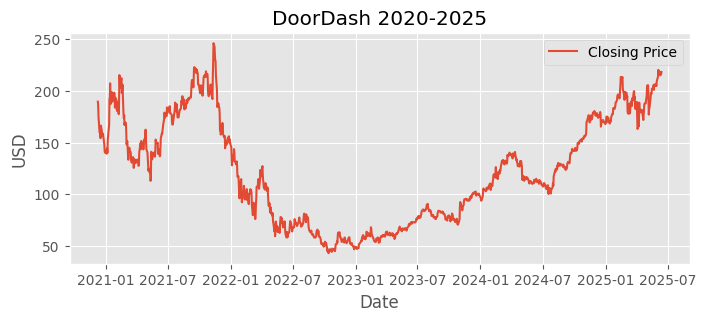

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 3))
plt.title("DoorDash 2020-2025")
plt.xlabel("Date")
plt.ylabel("USD")

# Plot the closing price
plt.plot(df.Close, label="Closing Price")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

#### This below, we add element to the graph including Upper and Lower Bollinger Band for technical analysis. This include price moving average (20 days prior included) and the sub graph showing volatility and volume associate with the price pattern.

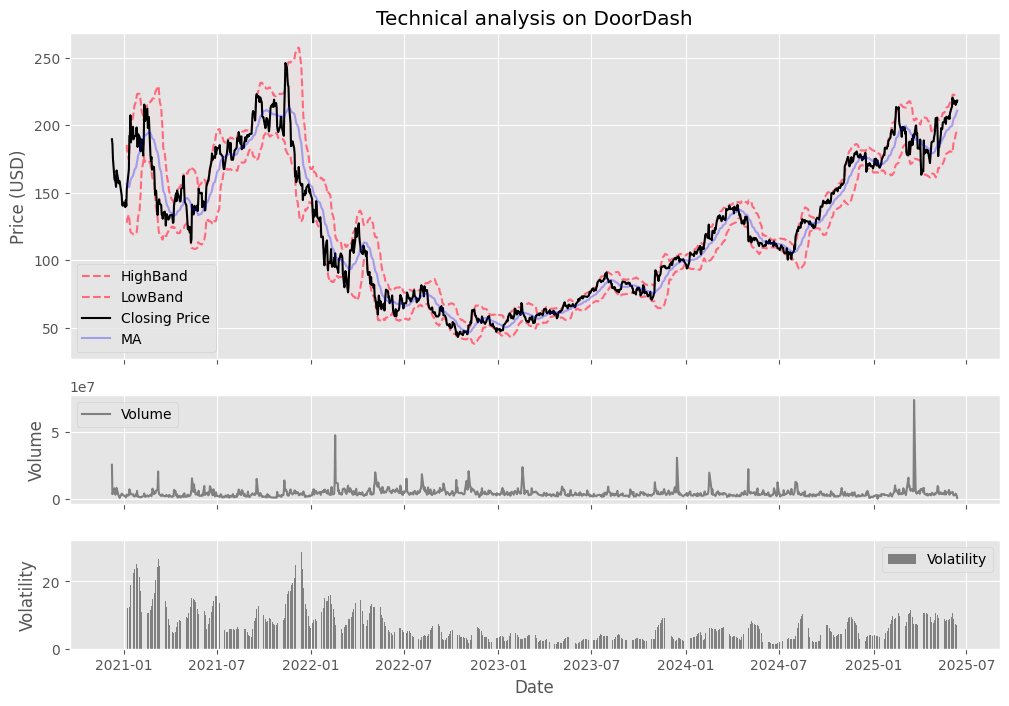

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# Main Plot: Bollinger Bands
ax1.set_title("Technical analysis on DoorDash")
ax1.set_ylabel("Price (USD)")
ax1.plot(df.HighBand, label="HighBand", color="#FF697D", linestyle="--")
ax1.plot(df.LowBand, label="LowBand", color="#FF697D", linestyle="--")
ax1.fill_between(df.index, df.HighBand, df.LowBand, color="#F7CCD2", alpha=0.2)
ax1.plot(df.Close, label="Closing Price", color="black")
ax1.plot(df.SMA, label="MA", color="blue", alpha=0.3)
ax1.legend()

# Volume
ax2.set_ylabel("Volume")
ax2.plot(df.Volume, label="Volume", color="grey")
ax2.legend()

# Subplot 3: Volatility
ax3.set_ylabel("Volatility")
ax3.set_xlabel("Date")
ax3.bar(df.index,df.Dev, label="Volatility", color="grey")
ax3.legend()

plt.show()

#### Now we are assessing the log daily return distribution depicted as a histrogram to see frequency and how the daily return are distributed .

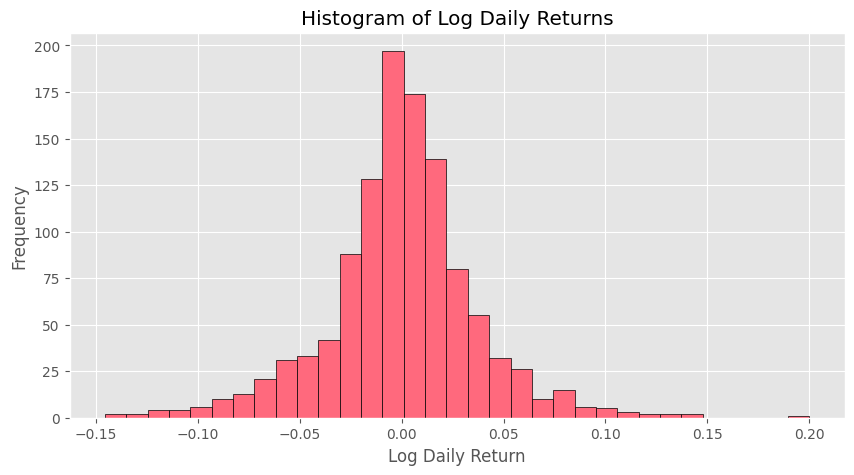

In [110]:
log_ret = df['Log_Returns'].dropna() 
bins = int(np.sqrt(len(log_ret)))
plt.figure(figsize=(10, 5))
plt.hist(log_ret, bins=bins, edgecolor='k', color="#FF697D")
plt.title("Histogram of Log Daily Returns")
plt.xlabel("Log Daily Return")
plt.ylabel("Frequency")
plt.show()

#### Finally, we also want to learn the about pattern of how the daily returns and trading volume go together. This is the scatter plot showing "correlation" between daily volume trade and how it has the effect on return, or vice versa  

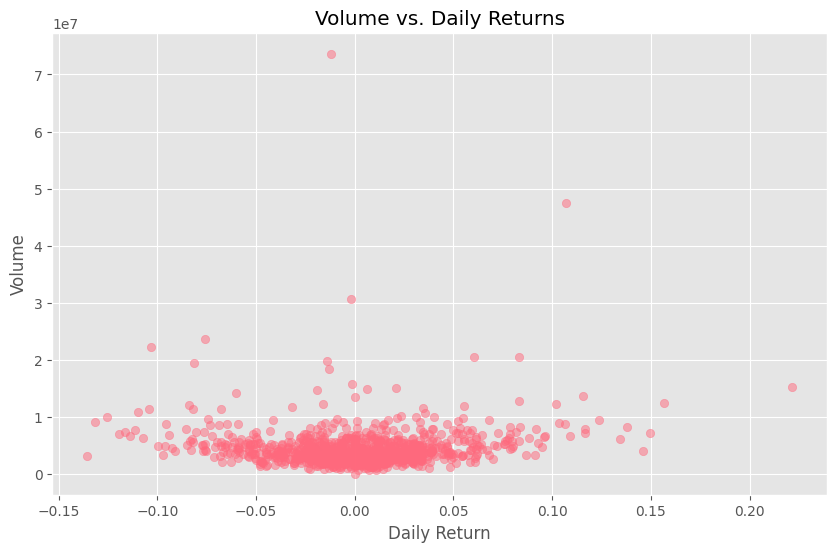

In [111]:
scatter_data = df.dropna(subset=['Returns'])

# Create scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Returns'],scatter_data['Volume'], color = "#FF697D", alpha=0.5)
plt.title('Volume vs. Daily Returns')
plt.ylabel('Volume')
plt.xlabel('Daily Return')
plt.grid(True)
plt.show()

## Investment Analysis and Decision by our Concensus

### Person 1 comments: 
> DoorDash’s strong position in the fast-growing online delivery market, along with its expansion into groceries, retail, and advertising, gives it an edge over competitors both industrially and economically. The company benefits from network effects that help increase profits and market share, improving its long-term outlook. As more people value convenience and digital services, the investment case becomes even stronger. DoorDash has proven it can manage tough times, like inflation and shifting consumer habits, by keeping demand steady and maintaining solid cash flow. Over the long run, it is likely to be a good investment choice.

> However, the financial data shows that despite strong growth in the past two years, the stock is volatile, with swings between –15% and +20%. Currently, the price is higher than the 20-day moving average and near the upper band, which could signal a short-term pullback. Investors should be cautious about buying at this level, as the price may drop below the moving average. Overall, a long-term strategy is recommended, with some risk management tools (e.g. derivatives or stop-loss orders) to help reduce short-term risks.

### Person 2 comments:
> DoorDash went public with a high opening price, driven by investor optimism about shifting consumer behavior toward delivery. During the COVID era, many believed the food delivery sector would massively growing, but assumptions were still unstable at the time. The industry saw intense competition from players like Uber Eats, Grab, and Foodpanda, and required heavy spending on marketing to build customer loyalty. Macroeconomic factors like high inflation, reduced spending power, and rising interest rates also added pressure to business trajectory back then.

> Technically, the stock showed high volatility post-IPO as hype drove strong price movements. It cooled off in early 2021, then surged again after the first COVID vaccine was approved. But once people started dining out again, delivery demand dropped, and so did the catalyst. Volatility rose during trend reversals, especially from “buy the dip” behavior. The data also shows the biggest rallies often come right after steep drops in 4 out of the 5 years. Histrogram just show that the return distribution has right (fat) tail, we can expect the super efficient trader to gain som esignificant (non-zero) profit from DASH stock. 

> From chart signals, Bollinger Bands have many ways to be interpreted. As discussed in class, if the price hits the upper bound, it suggests an overbought condition, and the price normally corrects downward—vice versa for the lower bound. Following this logic, as of the analysis day, we observed an overbought signal and expect the price to correct back to the mean soon. From user experience, we assess it another way: if the price cuts the SMA and LMA from below, it signals an uptrend, and vice versa if it cuts and goes below the SMA line. At this time, in early June, the price has just surpassed the SMA level. We expected a short-term positive trend, which actually happened in the last two weeks. 

> Looking forward, in the long run, DoorDash has regained momentum, even surpassing its IPO price. This reflects market confidence. Still, caution is needed.

### Person 3 comments:
> From the price chart, it can be seen that DoorDash's stock price had been falling since its high in early 2021, and fell to around $50 in mid-2022 to form a long-term bottom; then the trend reversed, and it has returned to the $200 line along a stable upward channel, approaching the historical resistance zone. The Bollinger Bands chart shows that the recent closing price has touched the upper track many times and the moving average remains upward, and the momentum is still strong, but it also suggests that the short-term has entered the "hot" range. 

> In the volume-volatility joint chart, the volume corresponding to the latest round of pull-ups has not been significantly enlarged, and although the intraday volatility has converged significantly compared with 2021–2022, it has been rising gently since the end of 2024, indicating that the funds are limited in chasing prices and the volatility risk is returning. On the whole, the long-term bottom has been confirmed, and the upward trend is healthy, but the short-term position is close to the previous high and the volume and price diverge. So I suggest that if you want to increase your position, you should take the rhythm of buying in batches close to the moving average callback, rather than a one-time heavy position at a high level. At the same time, set a stop-loss or hedge to deal with possible volatility retracements.

### Person 4 comments:
> After technical analysis of DoorDash (DASH), we observed high volatility and price variability through evidence presented by the Bollinger Bands, rolling volatility, and 20-day momentum charts. These indicate that DASH experienced periodic short-term price movements often caused by market sentiment or news events. Abnormal return analysis also indicated certain periods with significantly positive or negative returns, indicating instances of significant deviation from performance. 

> While this analysis is helpful in deciding short-term trading concepts or times of high risk, it does not give any information regarding the firm's long-term fundamentals such as growth opportunity, profitability, or competitive advantage. Therefore, my recommendation would be to remain in our current position in DASH rather than taking on additional exposure now. A more analytical review with financial and strategic metrics will be required before discussing any additional exposure.

### Person 5 comments:
> Based on our analysie, DoorDash's stock price has shown a volatile upward trend. The logarithmic distribution of its daily returns, while broadly consistent with the characteristics of a normal distribution, is thick-tailed. This suggests occasional high volatility events in the market. Nonetheless, yields remained in a relatively moderate range for most trading days. The periodic spikes in stock prices and abnormal volume amplification usually resonate with earnings disclosures or major macro events, reflecting a concentrated periodic release of market sentiment.

> The 20-day rolling volatility indicator shows that the market has seen multiple cycles of risky climbs, with each dramatic rise in volatility accompanied by a significant mean-reversion effect, suggesting that the stock price has a self-stabilising mechanism after a risky event. The stock's price continues to exhibit mean-reversion characteristics, as evidenced by the frequent convergence of the stock's price to the moving averages and its strict adherence to the upper and lower Bollinger Band constraints set by the Bollinger Bands. The stock price tends to revert to its historical mean level in the long run, despite occasional volatility pulses in the market.


> Based on the current solid uptrend of the stock price, the controllable range of volatility and the fundamental supportive elements, I would recommend to moderately increase the proportion of DASH position. However, it is necessary to synchronize and strengthen the dynamic tracking of quarterly performance and pay close attention to the evolution of regulatory policies in the sharing economy, especially the potential risk factors that may affect the long-term growth logic.

## Concensus

#### The consensus view is that DoorDash has "long-term" potential driven by solid fundamentals, network effects, and market expansion. However, "all three perspectives caution against short-term" risks due to recent price volatility, overbought signals, and divergence between price and volume. A careful, long-term investment approach is favored, with gradual buying on pullbacks with risk management strategies in place to be aware of short-term corrections.